In [1]:
import torch
import pandas as pd
from tqdm.notebook import tqdm


In [2]:
df = pd.read_csv("C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/data/train_all_tasks.csv")
df.shape

(14000, 5)

In [3]:
df = df[df['label_sexist'] == 'sexist']
df.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
11,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2.1 descriptive attacks
17,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
18,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm
19,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
21,sexism2022_english-10606,If you want to attack culture and norms you ha...,sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
24,sexism2022_english-16370,"Nah, black women still get more replies on tin...",sexist,4. prejudiced discussions,4.2 supporting systemic discrimination against...
25,sexism2022_english-4429,dumb ass women today ask more why you are not ...,sexist,2. derogation,2.2 aggressive and emotive attacks
32,sexism2022_english-18545,Men can be whores also.,sexist,3. animosity,"3.1 casual use of gendered slurs, profanities,..."
33,sexism2022_english-11481,Husbands. Kill your piece of shit commie wives,sexist,"1. threats, plans to harm and incitement",1.2 incitement and encouragement of harm


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Encoding categorical data to integer labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_vector'] = le.fit_transform(df['label_vector'])
print(df['label_vector'])

8         4
11        2
17        4
18        1
19        5
         ..
13977     2
13990     5
13993    10
13994     3
13995     2
Name: label_vector, Length: 3398, dtype: int32


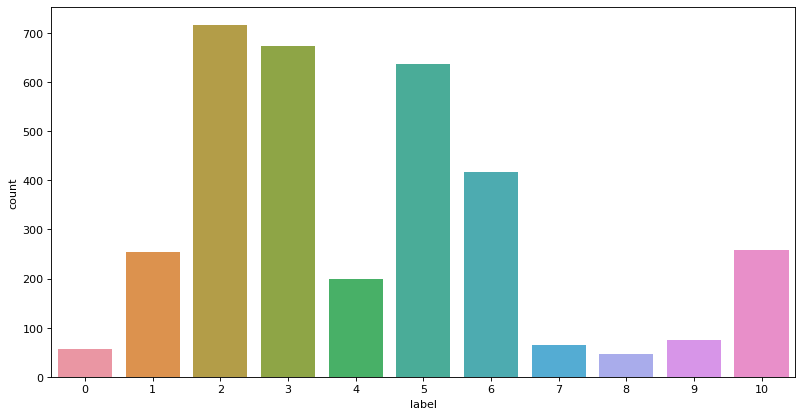

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
sns.countplot(x = df.label_vector)
plt.xlabel('label');


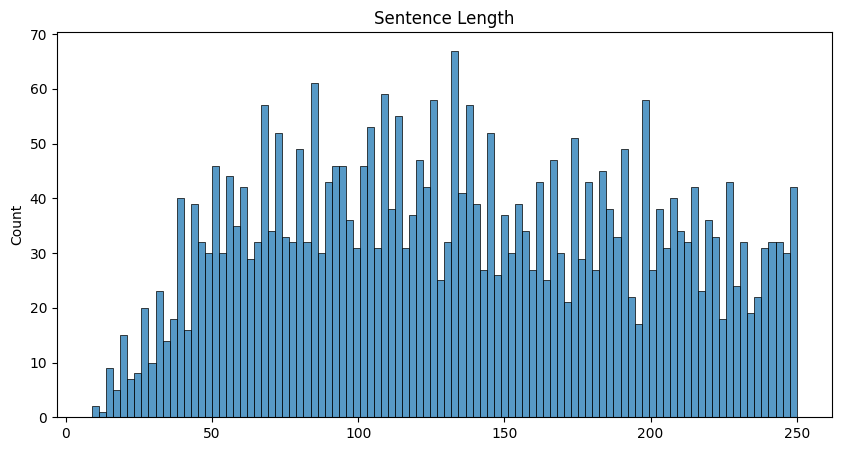

In [7]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.text], bins=100)
plt.title('Sentence Length')
plt.show()


In [8]:
#find the maximum length
max_len = max([len(sent) for sent in df.text])
print('Max length: ', max_len)


Max length:  250


In [9]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                   df.label_vector.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.label_vector.values)


In [10]:
#create new column
df['data_type'] = ['not_set'] * df.shape[0]
df.head()


,rewire_id,text,label_sexist,label_category,label_vector,data_type
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,4,not_set
11,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2,not_set
17,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,4,not_set
18,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1,not_set
19,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,5,not_set


In [11]:
#fill in data type
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'


In [12]:
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,data_type
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,4,train
11,sexism2022_english-760,They get the initial chance because they are a...,sexist,2. derogation,2,train
17,sexism2022_english-1108,ugly chicks A pussy is a pussy.,sexist,2. derogation,4,val
18,sexism2022_english-10099,fuck her off with a nine mm this is what you g...,sexist,"1. threats, plans to harm and incitement",1,train
19,sexism2022_english-10014,How about I talk shit to an idiot like you? Ar...,sexist,3. animosity,5,train


In [13]:
df.groupby(['label_vector', 'data_type']).count()


rewire_id  text  label_sexist  label_category
label_vector data_type                                               
0            train             48    48            48              48
             val                8     8             8               8
1            train            216   216           216             216
             val               38    38            38              38
2            train            609   609           609             609
             val              108   108           108             108
3            train            572   572           572             572
             val              101   101           101             101
4            train            170   170           170             170
             val               30    30            30              30
5            train            541   541           541             541
             val               96    96            96              96
6            train            355   355           355             355
             val               62    62            62              62
7            train             54    54            54              54
             val               10    10            10              10
8            train             40    40            40              40
             val                7     7             7               7
9            train             64    64            64              64
             val               11    11            11              11
10           train            219   219           219             219
             val               39    39            39              39

TOKENIZATION

In [14]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset


In [15]:
#load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)


In [16]:
#tokenize train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [17]:
#tokenizer val set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                #add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 250,
                                                return_tensors = 'pt')


In [18]:
encoded_data_train


{'input_ids': tensor([[  101,  2074,  1996,  ...,     0,     0,     0],
        [  101,  2027,  2131,  ...,     0,     0,     0],
        [  101,  6616,  2014,  ...,     0,     0,     0],
        ...,
        [  101,  2196,  5293,  ...,     0,     0,     0],
        [  101,  8840,  2140,  ...,     0,     0,     0],
        [  101, 15420,  2066,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [19]:
# le.get_params()
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'1.1 threats of harm': 0, '1.2 incitement and encouragement of harm': 1, '2.1 descriptive attacks': 2, '2.2 aggressive and emotive attacks': 3, '2.3 dehumanising attacks & overt sexual objectification': 4, '3.1 casual use of gendered slurs, profanities, and insults': 5, '3.2 immutable gender differences and gender stereotypes': 6, '3.3 backhanded gendered compliments': 7, '3.4 condescending explanations or unwelcome advice': 8, '4.1 supporting mistreatment of individual women': 9, '4.2 supporting systemic discrimination against women as a group': 10}


ENCODING

In [20]:
#encode train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type == 'train'].label_vector.values)


In [21]:
#encode val set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']

#convert data type to torch.tensor
labels_val = torch.tensor(df[df.data_type == 'val'].label_vector.values)


In [22]:
input_ids_train


tensor([[  101,  2074,  1996,  ...,     0,     0,     0],
        [  101,  2027,  2131,  ...,     0,     0,     0],
        [  101,  6616,  2014,  ...,     0,     0,     0],
        ...,
        [  101,  2196,  5293,  ...,     0,     0,     0],
        [  101,  8840,  2140,  ...,     0,     0,     0],
        [  101, 15420,  2066,  ...,     0,     0,     0]])

In [23]:
attention_masks_train


tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [24]:
labels_train


tensor([ 4,  2,  1,  ..., 10,  3,  2], dtype=torch.int32)

In [25]:
#create dataloader
dataset_train = TensorDataset(input_ids_train, 
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val, 
                             attention_masks_val, 
                             labels_val)

In [26]:
print(len(dataset_train))
print(len(dataset_val))


2888
510


In [27]:
dataset_train


In [28]:
dataset_train.tensors


(tensor([[  101,  2074,  1996,  ...,     0,     0,     0],
         [  101,  2027,  2131,  ...,     0,     0,     0],
         [  101,  6616,  2014,  ...,     0,     0,     0],
         ...,
         [  101,  2196,  5293,  ...,     0,     0,     0],
         [  101,  8840,  2140,  ...,     0,     0,     0],
         [  101, 15420,  2066,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([ 4,  2,  1,  ..., 10,  3,  2], dtype=torch.int32))


SET UP BERT PRETRAINED MODEL
```
# This is formatted as code
```



In [29]:
label_dict = {'1.1 threats of harm': 0, '1.2 incitement and encouragement of harm': 1, '2.1 descriptive attacks': 2, '2.2 aggressive and emotive attacks': 3,
              '2.3 dehumanising attacks & overt sexual objectification': 4, '3.1 casual use of gendered slurs, profanities, and insults': 5,
              '3.2 immutable gender differences and gender stereotypes': 6, '3.3 backhanded gendered compliments': 7, 
              '3.4 condescending explanations or unwelcome advice': 8, '4.1 supporting mistreatment of individual women': 9, 
              '4.2 supporting systemic discrimination against women as a group': 10}

In [30]:
from transformers import BertForSequenceClassification

#load pre-trained BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [31]:
#model summary
model.config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolut

Create Data Loaders

In [32]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 4 #since we have limited resource

#load train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#load val set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

Set Up Optimizer and Scheduler


In [33]:
from transformers import AdamW, get_linear_schedule_with_warmup
epochs = 10

#load optimizer
optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [34]:
#load scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

Define Performance Metrics


In [35]:
import numpy as np
from sklearn.metrics import f1_score

#f1 score
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')


In [36]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [37]:
def evaluate(dataloader_val):

    #evaluation mode disables the dropout layer 
    model.eval()
    
    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in tqdm(dataloader_val):
        
        #load into GPU
        batch = tuple(b.to(device) for b in batch)
        
        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2].type(torch.LongTensor).to(device)}

        #compute logits
        with torch.no_grad():        
            outputs = model(**inputs)
        
        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

TRAIN MODEL

In [38]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)



In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [40]:
for epoch in tqdm(range(1, epochs+1)):

    #set model in train mode
    model.train()

    #tracking variable
    loss_train_total = 0
    
    #set up progress bar
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch), 
                        leave=False, 
                        disable=False)
    
    for batch in progress_bar:
        #set gradient to 0
        model.zero_grad()

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].type(torch.LongTensor).to(device)}
        
        outputs = model(**inputs)
        loss = outputs[0] #output.loss
        loss_train_total +=loss.item()

        #backward pass to get gradients
        loss.backward()
        
        #clip the norm of the gradients to 1.0 to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        #update optimizer
        optimizer.step()

        #update scheduler
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})     
    
    tqdm.write('\nEpoch {epoch}')
    
    #print training result
    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    #evaluate
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    #f1 score
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.887752112919604


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.648189827799797
F1 Score (weighted): 0.27423254825592464


Epoch 2:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.5044632420315307


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.4729409515857697
F1 Score (weighted): 0.43387207564583946


Epoch 3:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 1.1952624055982626


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.460478536784649
F1 Score (weighted): 0.42542055215674346


Epoch 4:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.898395248355958


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.4239706322550774
F1 Score (weighted): 0.5127944716979531


Epoch 5:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.635949967816018


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.557330571115017
F1 Score (weighted): 0.5184514810395513


Epoch 6:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.4497918281446203


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.7009534537792206
F1 Score (weighted): 0.5216128757561431


Epoch 7:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.3246931135138481


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 1.9191904962062836
F1 Score (weighted): 0.5087040366627765


Epoch 8:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.23586458403106336


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.1335767209529877
F1 Score (weighted): 0.5101179393824746


Epoch 9:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.1925727555385102


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.2587292417883873
F1 Score (weighted): 0.5116800032174099


Epoch 10:   0%|          | 0/722 [00:00<?, ?it/s]


Epoch {epoch}
Training loss: 0.16016717130992913


  0%|          | 0/16 [00:00<?, ?it/s]

Validation loss: 2.302587702870369
F1 Score (weighted): 0.5117416622825568


Model Evaluation


In [41]:
outputs.loss


tensor(0.1360, device='cuda:0', grad_fn=<NllLossBackward0>)

In [42]:
outputs.logits


tensor([[-1.2326, -0.2400, -1.3223, -2.0592, -1.0206, -1.1659,  6.2808,  0.1482,
          0.3485, -0.7505,  0.0238],
        [ 0.2183, -0.2473, -0.9345, -0.7970,  0.6866,  7.7648, -0.9951, -1.5154,
         -0.5638, -0.0599, -0.9414],
        [ 1.7688, -1.0489, -0.9273,  5.6906,  1.7173,  1.2096, -2.8091, -0.7891,
         -0.4633, -1.6605, -1.7452],
        [-2.1549, -1.5194, -0.3023, -2.6391, -0.2771, -1.4297,  3.4556, -0.0344,
          0.6736, -1.1904,  2.6243]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [43]:
#save model
model.to(device)
pass


In [44]:
#evaluate
_, predictions, true_vals = evaluate(dataloader_val)

  0%|          | 0/16 [00:00<?, ?it/s]

In [45]:
#get accuracy score
accuracy_per_class(predictions, true_vals)

Class: 1.1 threats of harm
Accuracy:2/8

Class: 1.2 incitement and encouragement of harm
Accuracy:25/38

Class: 2.1 descriptive attacks
Accuracy:61/108

Class: 2.2 aggressive and emotive attacks
Accuracy:57/101

Class: 2.3 dehumanising attacks & overt sexual objectification
Accuracy:8/30

Class: 3.1 casual use of gendered slurs, profanities, and insults
Accuracy:63/96

Class: 3.2 immutable gender differences and gender stereotypes
Accuracy:26/62

Class: 3.3 backhanded gendered compliments
Accuracy:1/10

Class: 3.4 condescending explanations or unwelcome advice
Accuracy:0/7

Class: 4.1 supporting mistreatment of individual women
Accuracy:5/11

Class: 4.2 supporting systemic discrimination against women as a group
Accuracy:17/39



In [46]:
predictions

array([[-1.1331068 , -0.73585844, -0.1119692 , ..., -1.0842674 ,
        -1.1778668 , -1.1581167 ],
       [-0.44605863, -0.9819207 ,  0.3892937 , ..., -0.7240205 ,
        -2.1434047 , -1.0665244 ],
       [-2.5715506 , -2.3212833 ,  6.093752  , ..., -1.4334593 ,
        -0.75160295, -0.9795677 ],
       ...,
       [ 2.4005704 , -0.19947231, -3.2343764 , ...,  1.3242704 ,
        -1.09888   ,  1.3741065 ],
       [-0.92175263, -0.645213  , -0.43960023, ..., -0.8208273 ,
        -0.33186936, -0.69556963],
       [-1.941527  ,  0.35752594,  2.2854755 , ..., -2.2311172 ,
         1.0585921 , -0.51293606]], dtype=float32)

In [47]:
true_vals

array([ 3,  3,  2,  3,  5,  2,  2,  1,  5,  2,  1,  4, 10,  4,  5,  9,  9,
        3, 10, 10,  4,  5,  6,  1, 10,  5,  2,  5,  2, 10,  4,  2,  2,  5,
        3, 10,  6,  5,  0,  5,  5,  3,  9, 10,  2,  5,  5,  3,  3,  2, 10,
        9,  2,  8,  1,  2,  3,  0,  3,  6,  5,  9,  5,  4,  5, 10,  3,  3,
        6,  3,  5,  5,  3,  2,  6,  2, 10,  3,  5,  3,  6,  3,  6,  5,  2,
        3,  3,  1,  6,  4,  5,  6,  5,  8,  4,  2,  2,  2,  2,  4,  5, 10,
        6,  5,  0,  2,  8,  3,  6, 10,  6,  5,  5,  8,  3,  5,  2,  1,  2,
        5,  5,  2,  0,  2,  6,  2,  2,  2,  6,  2,  1,  2,  1,  5,  8,  1,
        5,  3,  5,  2,  6,  3, 10,  3,  5,  4,  6,  5,  5,  4,  6,  2,  3,
        6,  1,  4,  2,  9,  5,  4,  2,  3,  3,  7,  6, 10,  3,  6,  3, 10,
        6,  3,  1,  3,  2,  1,  3,  1,  5,  5,  5,  2,  3,  7,  6,  6,  2,
       10,  5,  1,  5,  5,  3,  1,  6,  6,  3,  2,  5,  8,  2, 10,  2,  2,
        3,  4, 10, 10,  6,  4,  2, 10,  3,  3,  6,  3,  5,  3,  2,  1,  3,
        6,  3,  2,  1,  3

In [48]:
preds_flat = np.argmax(predictions, axis=1).flatten()
labels_flat = true_vals.flatten()

print(preds_flat)
print(labels_flat)

[ 5  3  2  3  5  2  4  2  3  2 10  6  3  2  5  9  9  5  6  2  3  5  2  1
  4  5  2  5  6 10  2  2  3  5  5  1  6  3  0  3  2  5  6  9  3  3  5  2
  3  2  2  9  3  6  1  6  3 10  3  6  5  9  3  5  5 10  3  2  2  2  5  6
  3  2  6 10 10  3  2  3  6  5  1  6  2  3  5  1  6  4  5 10  5  3  4  2
  2  4 10  4  5  2  2  5  1  4 10  3  6 10  2  3  3  2  3  5  2  1  3  5
  3  2  5  3  2  2  2  5  2  2  0  6  1  5  2  3  5  3  3  2  2  3  6  3
  5  2  2  5  5  2  6  6  3  2  1  0  2  1  5  6 10  5  5  3  2  2  3  2
  3  6  6  5  0  5  2  0  2  1  5  5  3  2  3  6  2  6 10  2  3  1  1  5
  3  5  2  2  3  2  5 10  2 10  2  2  3  4  5 10  2  3  2 10  4  3  6  6
  3  3  6  1  3  2  5  6  1  5  5  3  2  3  3  6  6  5  3  3  2  2  2  3
 10  1  5  6  3  5  3  3  5  6  2  1  3  2  6  6  6  2  4  5  2  3  5  3
  3  2  3  2  1  3  5  2  3  5 10  6  2  3  4  5  1  5  3  2  2  2  2  3
  3  6  4  5  2  2 10  5  5  4  5  1  2  2  3  3  5  2  6  6  5  5  2  1
  2  6  1  2 10  1 10  4  3  2  5  3  2  1  1  3  6

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

In [50]:
accuracy = accuracy_score(y_true = labels_flat, y_pred = preds_flat )
f1 = f1_score(y_true = labels_flat, y_pred = preds_flat, average = 'weighted')
print(f"The accuracy from sentiment classification: {accuracy}")
print(f"with f1 score: {f1}")
print(classification_report(y_true = labels_flat, y_pred = preds_flat ))

The accuracy from sentiment classification: 0.5196078431372549
with f1 score: 0.5117416622825568
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.74      0.66      0.69        38
           2       0.46      0.56      0.50       108
           3       0.54      0.56      0.55       101
           4       0.40      0.27      0.32        30
           5       0.62      0.66      0.64        96
           6       0.40      0.42      0.41        62
           7       1.00      0.10      0.18        10
           8       0.00      0.00      0.00         7
           9       0.83      0.45      0.59        11
          10       0.50      0.44      0.47        39

    accuracy                           0.52       510
   macro avg       0.52      0.40      0.42       510
weighted avg       0.53      0.52      0.51       510



c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mufdu\anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Sentiment classification')

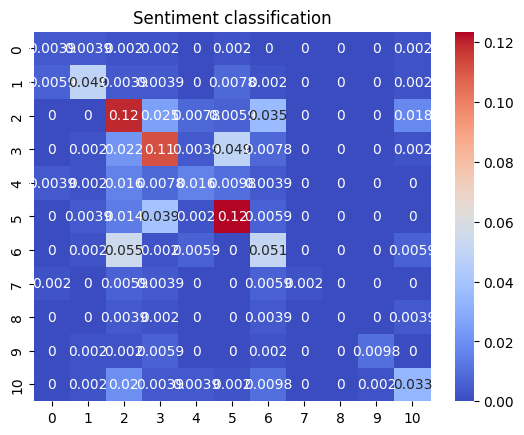

In [51]:
sns.heatmap(confusion_matrix(y_true= labels_flat, y_pred = preds_flat) / len(preds_flat), 
            annot = True, cmap ='coolwarm')
plt.title('Sentiment classification')

In [52]:
torch.save(model, "C:/Users/mufdu/Documents/Deep-Learning/SemEval-Task10/Bert-based-uncased/model_C")

In [53]:
# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)